# Загрузка базы подготовка базы к обучению AutoML


In [ ]:
import matplotlib.pyplot as plt # matplotlib для графиков
import seaborn as sns # seaborn для графиков
import numpy as np    # Нампай для массивов
import pandas as pd   # Пандас для данных
import re             # Регулярные выражения
from tensorflow.keras import utils # Для приведения к категориальным данным
from google.colab import files     # Загрузка файлов


In [ ]:
!pip install tensorflow

In [ ]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загружаем базу
df = pd.read_csv('/content/dataset1.csv')
df

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,248828,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,от 43 до 60 дней,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,False,False,True,Осимертиниб,"Возможна низкая эффективность Дурвалумаба, Оси..."
248828,248829,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,более 61 дня,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,True,False,False,0,0
248829,248830,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,до 42 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."
248830,248831,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,от 43 до 60 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."


# Устанавливаем библиотеку для работы с autokeras



In [ ]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.8/584.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 19.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from IPython.display import display
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import csv
import autokeras as ak
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend


In [ ]:
# Запишем датасет в переменную и выведем на экран !!! После этого запуска кода перезагружаем базу заново, что бы не выскакивали баги
df = pd.read_csv('dataset1.csv', quoting=csv.QUOTE_NONE)
display(df)

# Выведем имена столбцов
print(df.columns)

NameError: ignored

In [ ]:
columns_to_remove = ['Поставьте галочку, если уверены на 100%', 'Если 75%', 'Если 50%', 'Альтернатива, если 50% - обязательно']
df = df.drop(columns=columns_to_remove)

In [ ]:
df.nunique()

id_ответа                                                   248832
Раса                                                             3
Пол                                                              2
Возраст                                                          2
Статус курения                                                   3
ECOG                                                             2
Есть опухолевая нагрузка? (симптомная опухоль)                   2
Ко-мутации KRAS                                                  2
Ко-мутации p53.                                                  2
Ко-мутации STK11                                                 2
Ко-мутации KEAP1                                                 2
Срок от окончания ХЛТ                                            3
Молекулярный статус (только для неплоскоклеточного рака)         6
PD-L1 статус                                                     3
Предпочтение пациента по ответу на терапию                    

In [ ]:
# Выведем информацию по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 17 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   id_ответа                                                 248832 non-null  int64 
 1   Раса                                                      248832 non-null  object
 2   Пол                                                       248832 non-null  object
 3   Возраст                                                   248832 non-null  object
 4   Статус курения                                            248832 non-null  object
 5   ECOG                                                      248832 non-null  object
 6   Есть опухолевая нагрузка? (симптомная опухоль)            248832 non-null  object
 7   Ко-мутации KRAS                                           248832 non-null  object
 8   Ко-мутации p53

In [ ]:
for name, values in df.items():
  print(name, ":", df[name].unique())

id_ответа : [     1      2      3 ... 248830 248831 248832]
Раса : ['Азиатская' 'Европейская' 'Другая']
Пол : [' Мужской' ' Женский']
Возраст : [' До 70' ' >70']
Статус курения : [' В настоящее время'
 ' Курение в прошлом (бросил более 1 месяца до 1 года)'
 ' Курение в прошлом (бросил более 1 года)']
ECOG : [' 0-1' '2']
Есть опухолевая нагрузка? (симптомная опухоль) : [' да' ' нет']
Ко-мутации KRAS : [' да' ' нет']
Ко-мутации p53. : [' да' ' нет']
Ко-мутации STK11 : [' да' ' нет']
Ко-мутации KEAP1 : [' да' ' нет']
Срок от окончания ХЛТ : ['до 42 дней' 'от 43 до 60 дней' 'более 61 дня']
Молекулярный статус (только для неплоскоклеточного рака) : [' нет мутаций' ' не исследовались' ' EGFR редкий вариант' ' EGFR ex19'
 ' EGFR ex21' ' ALK позитивный']
PD-L1 статус : [' Не исследовался' ' Менее 1%' ' Более 1%']
Предпочтение пациента по ответу на терапию : [' Результативность лечения' ' сохранение качества жизни']
Ответ эксперта (Лактионов) : ['Дурвалумаб' 'Наблюдение' 'Осимертиниб' 'Алектини

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Список для хранения результатов
results = []

# Применение LabelEncoder ко всем столбцам
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col].astype(str))
        unique_values = df[col].astype(str).unique()
        mapping = {val: idx for idx, val in enumerate(unique_values)}
        results.append(f"# Словарь порогов {col}:\n{col}_class = {mapping}\n")

# Вывод результатов
for result in results:
    print(result)

In [ ]:
# Пример для словаря порогов Раса:
Раса_class = {'0': 0, '2': 1, '1': 2}
description_race = {'0': 'Азиатская', '2': 'Европейская', '1': 'Другая'}

# Вывод информации в желаемом формате
print("Mapping для Раса:")
for key, value in Раса_class.items():
    print(f'{key} - {description_race[key]}_{value}')

# Пример для словаря порогов Пол:
Пол_class = {'1': 0, '0': 1}
description_gender = {'1': 'Мужской', '0': 'Женский'}

print("\nMapping для Пол:")
for key, value in Пол_class.items():
    print(f'{key} - {description_gender[key]}_{value}')

# Пример для словаря порогов Возраст:
Возраст_class = {'1': 0, '0': 1}
description_age = {'1': 'До 70', '0': '>70'}

print("\nMapping для Возрас:")
for key, value in Возраст_class.items():
    print(f'{key} - {description_age[key]}_{value}')

# Пример для словаря Статус курения:
Статус_курения_class = {'0': 0, '2': 1, '1': 2}
description_smoking = {'0': 'В настоящее время', '2': 'Курение в прошлом (бросил более 1 месяца до 1 года)', '1': 'Курение в прошлом (бросил более 1 года)'}

print("\nMapping для Статус_курения:")
for key, value in Статус_курения_class.items():
    print(f'{key} - {description_smoking[key]}_{value}')

# Пример для словаря порогов ECOG:
ECOG_class = {'0': 0, '1': 1}
description_ecog = {'0':'0-1', '1': '2'}

print("\nMapping для ECOG:")
for key, value in ECOG_class.items():
    print(f'{key} - {description_ecog[key]}_{value}')

# Пример для словаря порогов Есть опухолевая нагрузка:
Есть_опухолевая_нагрузка_симптомная_опухоль_class = {'0': 0, '1': 1}
description_tumor_load = {'0':'да', '1': 'нет'}

print("\nMapping для Есть опухолевая нагрузка:")
for key, value in Есть_опухолевая_нагрузка_симптомная_опухоль_class.items():
    print(f'{key} - {description_tumor_load[key]}_{value}')

# Пример для словаря порогов KRAS:
Ко_мутации_KRAS_class = {'0': 0, '1': 1}
description_kras = {'0': 'да', '1': 'нет'}

print("\nMapping для KRAS:")
for key, value in Ко_мутации_KRAS_class.items():
    print(f'{key} - {description_kras[key]}_{value}')

# Пример для словаря порогов p53:
Ко_мутации_p53_class = {'0': 0, '1': 1}
description_p53 = {'0': 'да', '1': 'нет'}

print("\nMapping для p53:")
for key, value in Ко_мутации_p53_class.items():
    print(f'{key} - {description_p53[key]}_{value}')

# Пример для словаря порогов STK11:
Ко_мутации_STK11_class = {'0': 0, '1': 1}
description_stk11 = {'0': 'да', '1': 'нет'}

print("\nMapping для STK11:")
for key, value in Ко_мутации_STK11_class.items():
    print(f'{key} - {description_stk11[key]}_{value}')

# Пример для словаря порогов KEAP1:
Ко_мутации_KEAP1_class = {'0': 0, '1': 1}
description_keap1 = {'0': 'да', '1': 'нет'}

print("\nMapping для KEAP1:")
for key, value in Ко_мутации_KEAP1_class.items():
    print(f'{key} - {description_keap1[key]}_{value}')

# Пример для словаря порогов ХЛТ:
Срок_от_окончания_ХЛТ_class = {'1': 0, '2': 1, '0': 2}
description_time_from_cht = {'1': 'до 42 дней', '2': 'от 43 до 60 дней','0': 'более 61 дня'}

print("\nMapping для ХЛТ:")
for key, value in Срок_от_окончания_ХЛТ_class.items():
    print(f'{key} - {description_time_from_cht[key]}_{value}')

# Пример для словаря порогов Молекулярного статуса:
Молекулярный_статус_только_для_неплоскоклеточного_рака_class = {'5': 0, '4': 1, '3': 2, '1': 3, '2': 4, '0': 5}
description_molecular_status = {'5': 'нет мутаций', '4': 'не исследовались', '3': 'EGFR редкий вариант', '1': 'EGFR ex19', '2': 'EGFR ex21', '0': 'ALK позитивный'}

print("\nMapping для Молекулярного статуса:")
for key, value in Молекулярный_статус_только_для_неплоскоклеточного_рака_class.items():
    print(f'{key} - {description_molecular_status[key]}_{value}')

# Пример для словаря порогов PD_L1_статуса:
PD_L1_статус_class = {'2': 0, '1': 1, '0': 2}
description_pdl1_status = {'2': 'Не исследовался', '1': 'Менее 1%', '0': 'Более 1%'}

print("\nMapping для PD-L1 статуса:")
for key, value in PD_L1_статус_class.items():
    print(f'{key} - {description_pdl1_status[key]}_{value}')

# Пример для словаря порогов Предпочтения_пациента_по_ответу_на_терапию:
Предпочтение_пациента_по_ответу_на_терапию_class = {'0': 0, '1': 1}
description_patient_preference = {'0': 'Результативность лечения', '1': 'сохранение качества жизни'}

print("\nMapping для Предпочтения_пациента_по_ответу_на_терапию:")
for key, value in Предпочтение_пациента_по_ответу_на_терапию_class.items():
    print(f'{key} - {description_patient_preference[key]}_{value}')

# Пример для словаря порогов по_ответу_эксперта_Лактионова:
Ответ_эксперта_Лактионов_class = {'1': 0, '2': 1, '3': 2, '0': 3}
description_examiner_response = {'1': 'Дурвалумаб', '2': 'Наблюдение', '3': 'Осимертиниб', '0': 'Алектиниб'}

print("\nMapping по_ответу_эксперта_Лактионова:")
for key, value in Ответ_эксперта_Лактионов_class.items():
    print(f'{key} - {description_examiner_response[key]}_{value}')

# Пример для словаря порогов по Комментариям:
Комментарий_class = {'0': 0, '10': 1, '7': 2, '5': 3, '6': 4, '4': 5, '2': 6, '3': 7, '1': 8, '8': 9, '9': 10}
description_comment = {'0': '0',
                       '10': 'Нет доказательной базы для назначения после перерыва >61 дня после ХЛТ',
                       '7': 'Возможно есть мутации и эффективность Дурвалумаба будет низкой',
                       '5': 'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы',
                       '6': 'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы, эффективность Осимертиниба ниже при 21 экзоне',
                       '4': 'Возможна низкая эффективность Дурвалумаба, Алектиниб без доказательной базы',
                       '2': 'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%',
                       '3': 'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%, возможно есть активирующие мутации',
                       '1': 'Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба',
                       '8': 'Возможно есть мутации и эффективность Дурвалумаба будет низкой\n, Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба',
                       '9': 'Возможно есть мутации и эффективность Дурвалумаба будет низкой\n, Возможна низкая эффективность Дурвалумаба при PD-1 < 1%'}

print("\nMapping попо Комментариям:")
for key, value in Комментарий_class.items():
    print(f'{key} - {description_comment[key]}_{value}')


Mapping для Раса:
0 - Азиатская_0
2 - Европейская_1
1 - Другая_2

Mapping для Пол:
1 - Мужской_0
0 - Женский_1

Mapping для Возрас:
1 - До 70_0
0 - >70_1

Mapping для Статус_курения:
0 - В настоящее время_0
2 - Курение в прошлом (бросил более 1 месяца до 1 года)_1
1 - Курение в прошлом (бросил более 1 года)_2

Mapping для ECOG:
0 - 0-1_0
1 - 2_1

Mapping для Есть опухолевая нагрузка:
0 - да_0
1 - нет_1

Mapping для KRAS:
0 - да_0
1 - нет_1

Mapping для p53:
0 - да_0
1 - нет_1

Mapping для STK11:
0 - да_0
1 - нет_1

Mapping для KEAP1:
0 - да_0
1 - нет_1

Mapping для ХЛТ:
1 - до 42 дней_0
2 - от 43 до 60 дней_1
0 - более 61 дня_2

Mapping для Молекулярного статуса:
5 - нет мутаций_0
4 - не исследовались_1
3 - EGFR редкий вариант_2
1 - EGFR ex19_3
2 - EGFR ex21_4
0 - ALK позитивный_5

Mapping для PD-L1 статуса:
2 - Не исследовался_0
1 - Менее 1%_1
0 - Более 1%_2

Mapping для Предпочтения_пациента_по_ответу_на_терапию:
0 - Результативность лечения_0
1 - сохранение качества жизни_1

Mapping

In [ ]:
# Пример для словаря порогов Раса:
Раса_class = {'0': 0, '2': 1, '1': 2}

# Сопоставление числовых значений с текстовыми описаниями
mapping = {'0': 'Азиатская', '2': 'Европейская', '1': 'Другая'}

# Вывод уникальных значений
unique_values = Раса_class.keys()
for value in unique_values:
    print(f'{Раса_class[value]} - {mapping[value]}')

0 - Азиатская
1 - Европейская
2 - Другая


In [ ]:
#for name, values in df.items():
    #if df[name].dtype == 'object':
        #print(name, ":", df[name].unique())

In [ ]:
# Перепроверим информацию по датасету по изменению типа данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 17 columns):
 #   Column                                                    Non-Null Count   Dtype
---  ------                                                    --------------   -----
 0   id_ответа                                                 248832 non-null  int64
 1   Раса                                                      248832 non-null  int64
 2   Пол                                                       248832 non-null  int64
 3   Возраст                                                   248832 non-null  int64
 4   Статус курения                                            248832 non-null  int64
 5   ECOG                                                      248832 non-null  int64
 6   Есть опухолевая нагрузка? (симптомная опухоль)            248832 non-null  int64
 7   Ко-мутации KRAS                                           248832 non-null  int64
 8   Ко-мутации p53.         

In [ ]:
 #Отделим входные переменные
x = df[df.columns[1:15]]
x

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию
0,0,1,1,0,0,0,0,0,0,0,1,5,2,0
1,0,1,1,0,0,0,0,0,0,0,2,5,2,0
2,0,1,1,0,0,0,0,0,0,0,0,5,2,0
3,0,1,1,0,0,0,0,0,0,0,1,4,2,0
4,0,1,1,0,0,0,0,0,0,0,2,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,1,0,0,1,1,1,1,1,1,1,2,2,0,1
248828,1,0,0,1,1,1,1,1,1,1,0,2,0,1
248829,1,0,0,1,1,1,1,1,1,1,1,0,0,1
248830,1,0,0,1,1,1,1,1,1,1,2,0,0,1


In [ ]:
# Проверочные переменные
y = df[df.columns[15:17]]
y

,Ответ эксперта (Лактионов),Комментарий
0,1,0
1,1,0
2,2,10
3,1,7
4,1,7
...,...,...
248827,2,6
248828,2,0
248829,0,4
248830,0,4


In [ ]:
x_columns = df.columns[1:15]
x_columns


Index(['Раса', 'Пол', 'Возраст', 'Статус курения', 'ECOG',
       'Есть опухолевая нагрузка? (симптомная опухоль)', 'Ко-мутации KRAS',
       'Ко-мутации p53.', 'Ко-мутации STK11', 'Ко-мутации KEAP1',
       'Срок от окончания ХЛТ',
       'Молекулярный статус (только для неплоскоклеточного рака)',
       'PD-L1 статус', 'Предпочтение пациента по ответу на терапию'],
      dtype='object')

In [ ]:
# Проверочные переменные
y_columns = df.columns[15:17]
y_columns

Index(['Ответ эксперта (Лактионов)', 'Комментарий'], dtype='object')

In [ ]:
# Извлекаем данные в виде массивов NumPy
x_data = df[x_columns].values
y_data = df[y_columns].values

In [ ]:
x_data

array([[0, 1, 1, ..., 5, 2, 0],
       [0, 1, 1, ..., 5, 2, 0],
       [0, 1, 1, ..., 5, 2, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1]])

In [ ]:
y_data

array([[ 1,  0],
       [ 1,  0],
       [ 2, 10],
       ...,
       [ 0,  4],
       [ 0,  4],
       [ 2,  0]])

In [ ]:
# Разбиение наборов на общую и проверочную выборки
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, shuffle=True, random_state = 15)

In [ ]:

print("Training Data (NumPy):")
print(x_train)
print("Labels (NumPy):")
print(y_train)

print("Testing Data (NumPy):")
print(x_test)
print("Labels for Testing (NumPy):")
print(y_test)



Training Data (NumPy):
[[2 1 0 ... 0 0 1]
 [2 1 0 ... 3 2 1]
 [0 0 1 ... 1 1 0]
 ...
 [1 1 1 ... 2 1 1]
 [0 1 1 ... 4 1 0]
 [2 0 0 ... 1 2 1]]
Labels (NumPy):
[[2 0]
 [2 5]
 [3 5]
 ...
 [3 6]
 [1 3]
 [2 5]]
Testing Data (NumPy):
[[2 1 0 ... 0 0 0]
 [2 0 1 ... 4 2 0]
 [2 0 1 ... 2 1 1]
 ...
 [0 1 1 ... 2 1 0]
 [1 1 0 ... 2 2 1]
 [0 0 0 ... 3 1 1]]
Labels for Testing (NumPy):
[[ 0  4]
 [ 2 10]
 [ 2  6]
 ...
 [ 2  6]
 [ 3  6]
 [ 2  0]]


In [ ]:
print("Training Data:")
print(x_train)
print("Labels:")
print(y_train)
print(type(x_train))
print(type(y_train))

Training Data:
[[2 1 0 ... 0 0 1]
 [2 1 0 ... 3 2 1]
 [0 0 1 ... 1 1 0]
 ...
 [1 1 1 ... 2 1 1]
 [0 1 1 ... 4 1 0]
 [2 0 0 ... 1 2 1]]
Labels:
[[2 0]
 [2 5]
 [3 5]
 ...
 [3 6]
 [1 3]
 [2 5]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Вывод размеров обучающей и проверочной выборок
print(f'Размер обучающей выборки: {x_train.shape[0]}')
print(f'Размер проверочной выборки: {x_test.shape[0]}')

Размер обучающей выборки: 211507
Размер проверочной выборки: 37325


In [ ]:
# Уникальные значения для признаков (X)
unique_values_x = np.unique(x_data, axis=0)
print("Уникальные значения для признаков (X):")
print(unique_values_x)

Уникальные значения для признаков (X):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [2 1 1 ... 5 1 1]
 [2 1 1 ... 5 2 0]
 [2 1 1 ... 5 2 1]]


In [ ]:
# Уникальные значения для меток (Y)
unique_values_y = np.unique(y_data, axis=0)
print("\nУникальные значения для меток (Y):")
print(unique_values_y)


Уникальные значения для меток (Y):
[[ 0  4]
 [ 1  0]
 [ 1  1]
 [ 1  2]
 [ 1  3]
 [ 1  4]
 [ 1  7]
 [ 1  8]
 [ 1  9]
 [ 2  0]
 [ 2  1]
 [ 2  2]
 [ 2  3]
 [ 2  4]
 [ 2  5]
 [ 2  6]
 [ 2  8]
 [ 2  9]
 [ 2 10]
 [ 3  5]
 [ 3  6]]


In [ ]:
print(df.columns)

Index(['id_ответа', 'Раса', 'Пол', 'Возраст', 'Статус курения', 'ECOG',
       'Есть опухолевая нагрузка? (симптомная опухоль)', 'Ко-мутации KRAS',
       'Ко-мутации p53.', 'Ко-мутации STK11', 'Ко-мутации KEAP1',
       'Срок от окончания ХЛТ',
       'Молекулярный статус (только для неплоскоклеточного рака)',
       'PD-L1 статус', 'Предпочтение пациента по ответу на терапию',
       'Ответ эксперта (Лактионов)', 'Комментарий'],
      dtype='object')


In [ ]:
unique_values_race = df['Раса'].unique()

print("Уникальные значения в столбце 'Раса':")
print(unique_values_race)



Уникальные значения в столбце 'Раса':
[0 2 1]


In [ ]:
unique_values_gender = df['Пол'].unique()

print("Уникальные значения в столбце 'Пол':")
print(unique_values_gender)

Уникальные значения в столбце 'Пол':
[1 0]


## **Эксперементы**

# Эксперимент 1. Tuner по умолчанию, 3 запусков.

In [ ]:
# Инициализируйте классификатор структурированных данных.
reg = ak.StructuredDataRegressor(
    overwrite=True,
    max_trials=3,
    loss='mean_squared_error',
    metrics=['mean_absolute_error'],
    project_name='experiment1',
)

# поиск лучшей модели
reg.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Trial 3 Complete [00h 05m 29s]
val_loss: 0.08066200464963913

Best val_loss So Far: 0.0033937038388103247
Total elapsed time: 00h 14m 44s
Epoch 1/5
6610/6610 [==============================] - 21s 3ms/step - loss: 2.0260 - mean_absolute_error: 0.8929 - val_loss: 0.1691 - val_mean_absolute_error: 0.3157
Epoch 2/5
6610/6610 [==============================] - 20s 3ms/step - loss: 0.0445 - mean_absolute_error: 0.1381 - val_loss: 0.0025 - val_mean_absolute_error: 0.0400
Epoch 3/5
6610/6610 [==============================] - 21s 3ms/step - loss: 0.0032 - mean_absolute_error: 0.0377 - val_loss: 0.0049 - val_mean_absolute_error: 0.0496
Epoch 4/5
6610/6610 [==============================] - 23s 3ms/step - loss: 0.0027 - mean_absolute_error: 0.0313 - val_loss: 2.8373e-04 - val_mean_absolute_error: 0.0130
Epoch 5/5
6610/6610 [==============================] - 20s 3ms/step - loss: 0.0025 - mean_absolute_error: 0.0299 - val_loss: 0.0016 - val_mean_absolute_error: 0.0293


In [ ]:
best_model = reg.export_model()

In [ ]:
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14)]              0         
                                                                 
 multi_category_encoding (M  (None, 14)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 14)                29        
 on)                                                             
                                                                 
 dense (Dense)               (None, 32)                480       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

In [ ]:
# Используйте save_model из tensorflow.keras
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
import tensorflow as tf

In [ ]:
best_model.save('b_model_autokeras', save_format='tf')


In [ ]:
best_model.save('best_model_autokeras.keras')

In [ ]:
best_model.save('b1_model_autokeras.h5', save_format='h5')

NotImplementedError: ignored

In [ ]:
import os

# Вывести текущий рабочий каталог
print("Текущий рабочий каталог:", os.getcwd())

# Вывести содержимое текущего рабочего каталога
print("Содержимое текущего каталога:", os.listdir())

Текущий рабочий каталог: /content
Содержимое текущего каталога: ['.config', 'experiment1', 'dataset1.csv', 'b_model_autokeras.h5', 'b1_model_autokeras.h5', 'best_model_autokeras.keras', 'drive', 'b_model_autokeras', 'sample_data']


In [ ]:
import shutil

shutil.make_archive("/content/model_archive11", 'zip', "/content/b_model_autokeras")

'/content/model_archive11.zip'

In [ ]:
import shutil

shutil.make_archive("/content/model_archive2", 'zip', "/content/best_model_autokeras.keras")

'/content/model_archive2.zip'

In [ ]:
shutil.make_archive("/content/model_archive3", 'zip', "/content/b1_model_autokeras.h5")

'/content/model_archive3.zip'

In [ ]:
from google.colab import files

files.download("/content/model_archive11.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("/content/model_archive2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("/content/model_archive3.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predictions = best_model.predict(x_test)

1167/1167 [==============================] - 3s 3ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.029318011408672986
Mean Squared Error: 0.0016142364347999578


In [ ]:
import matplotlib.pyplot as plt

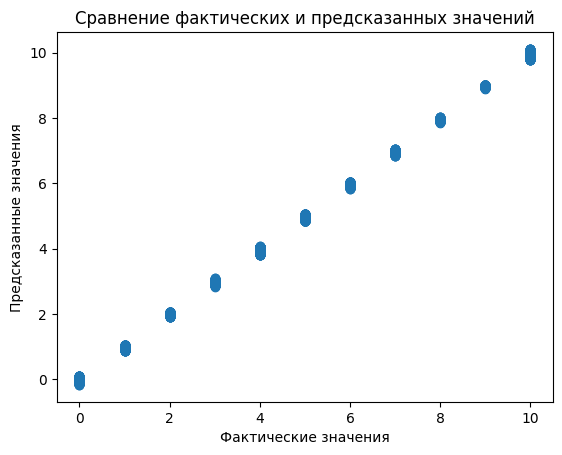

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение фактических и предсказанных значений')
plt.show()

In [ ]:
# Вывести предсказанные значения
print("Предсказанные значения:")
print(predictions)

Предсказанные значения:
[[-0.05112103  3.9441338 ]
 [ 1.9569961   9.960148  ]
 [ 1.9819324   5.991399  ]
 ...
 [ 2.0002177   5.9559865 ]
 [ 2.982596    5.930157  ]
 [ 1.995992   -0.0105629 ]]


In [ ]:
# Вывести фактические значения
print("Фактические значения:")
print(y_test)

Фактические значения:
[[ 0  4]
 [ 2 10]
 [ 2  6]
 ...
 [ 2  6]
 [ 3  6]
 [ 2  0]]


In [ ]:
# Вывести первое предсказание
print("Предсказанное значение (первое):", predictions[0])

Предсказанное значение (первое): [-0.05112103  3.9441338 ]


In [ ]:
# Выберите индекс элемента, для которого вы хотите получить предсказание (замените 0 на нужный индекс)
index_to_predict = 0

# Выберите соответствующие входные данные для предсказания
input_data_to_predict = x_test[index_to_predict:index_to_predict + 1]

# Получите предсказание для выбранных входных данных
single_prediction = best_model.predict(input_data_to_predict)

# Выведите предсказание
print(f'Предсказанное значение для индекса {index_to_predict}: {single_prediction}')

1/1 [==============================] - 0s 30ms/step
Предсказанное значение для индекса 0: [[-0.05112186  3.9441328 ]]


In [ ]:
# Вывести первое фактическое значение
print("Фактическое значение (первое):", y_test[0])

Фактическое значение (первое): [0 4]


In [ ]:
# Словарь для интерпретации предсказанных значений
EXPERTS_RESPONSE_THRESHOLD = {'1': 'Дурвалумаб', '2': 'Наблюдение', '3': 'Осимертиниб', '0': 'Алектиниб'}

# Словарь для интерпретации комментариев
COMMENTS_THRESHOLD = {'0': '0',
                      '10': 'Нет доказательной базы для назначения после перерыва >61 дня после ХЛТ',
                      '7': 'Возможно есть мутации и эффективность Дурвалумаба будет низкой',
                      '5': 'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы',
                      '6': 'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы, эффективность Осимертиниба ниже при 21 экзоне',
                      '4': 'Возможна низкая эффективность Дурвалумаба, Алектиниб без доказательной базы',
                      '2': 'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%',
                      '3': 'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%, возможно есть активирующие мутации',
                      '1': 'Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба',
                      '8': 'Возможно есть мутации и эффективность Дурвалумаба будет низкой, Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба',
                      '9': 'Возможно есть мутации и эффективность Дурвалумаба будет низкой, Возможна низкая эффективность Дурвалумаба при PD-1 < 1%'
                     }

# Указываем индекс, для которого хотим вывести предсказание и комментарий
i = 0

# Проверяем, существует ли индекс в словаре для предсказаний
index_predictions = predictions[i].argmax()
if str(index_predictions) in EXPERTS_RESPONSE_THRESHOLD:
    предсказанное_значение = EXPERTS_RESPONSE_THRESHOLD[str(index_predictions)]
    print(f'Ответ эксперта ({i + 1}): Предсказанное значение - {предсказанное_значение}')
else:
    print(f'Ответ эксперта ({i + 1}): Предсказанное значение с индексом {index_predictions} не найдено в словаре.')

# Проверяем, существует ли индекс в словаре для комментариев
index_comments = predictions[i].argmax()
if str(index_comments) in COMMENTS_THRESHOLD:
    комментарий = COMMENTS_THRESHOLD[str(index_comments)]
    print(f'Ответ эксперта ({i + 1}): Комментарий - {комментарий}')
else:
    print(f'Ответ эксперта ({i + 1}): Комментарий с индексом {index_comments} не найден в словаре.')

Ответ эксперта (1): Предсказанное значение - Дурвалумаб
Ответ эксперта (1): Комментарий - Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба
